In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading CSV

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df= df.rename(columns={  'Content Rating':'Content_Rating', 'Last Updated':'Last_Updated', 'Current Ver':'Current_Ver',
       'Android Ver':'Android_Ver'})

# Data Cleaning

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [10]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop([10472],inplace=True)

<AxesSubplot:>

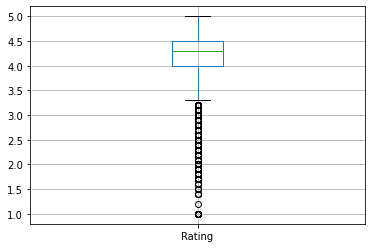

In [12]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

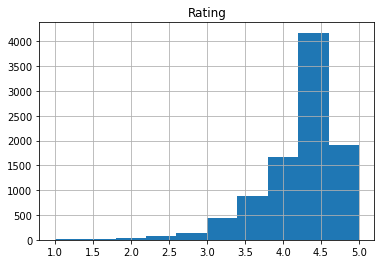

In [13]:
df.hist()

# Data Manipulation

In [14]:
def putMedian(val):
    return val.fillna(val.median())

In [15]:
df['Rating'] = df['Rating'].transform(putMedian)

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

In [17]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
df['Current_Ver'].fillna(str(df['Current_Ver'].mode().values[0]),inplace = True)
df['Android_Ver'].fillna(str(df['Android_Ver'].mode().values[0]),inplace = True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

Removing $ from Price section

In [19]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$','')if'$'in str(x)else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))


Ignore error while in Numeric section

In [20]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'coerce')

# Changing values in Installs

Removing " + " and " , " from Installs list

df['Installs'] = df['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else (x))
df['Installs'] = df["Installs"].apply(lambda x : str(x).replace(',','')if ',' in str(x) else (x))

def covertStr(val):
    

In [21]:
def removePlus(value):
    if ('+' in value):
        ans = value.replace("+","") 
        return ans
            
    else:
        return value



In [22]:
def removeComma(value):
    if (',' in value):
        ans = value.replace(",","")
        return ans
    else:
        return value

In [23]:
df['Installs'] = df['Installs'].apply(removePlus)
df['Installs'] = df['Installs'].apply(removeComma)


In [24]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [25]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [26]:
df['Installs'] = df["Installs"].apply(lambda x: float(x))

In [27]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [28]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [31]:
grp = df.groupby('Category')
x= grp['Rating'].agg(np.mean)
y= grp['Price'].agg(np.mean)
z= grp['Reviews'].agg(np.mean)


In [33]:
print(x)
print("------------------------")
print(y)
print("------------------------")
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

C:\Users\vivek\AppData\Local\Temp\ipykernel_10088\2280071939.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  rate = plt.plot(x,'g^',color='orange')


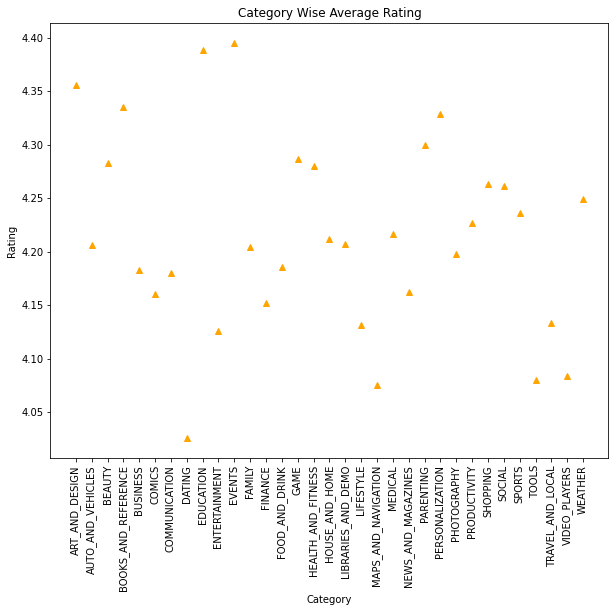

In [53]:
plt.figure(figsize=(10,8))
rate = plt.plot(x,'g^',color='orange')
plt.xticks(rotation = 90)
plt.title("Category Wise Average Rating")
plt.xlabel("Category")
plt.ylabel("Rating")
rate

C:\Users\vivek\AppData\Local\Temp\ipykernel_10088\752211238.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  price = plt.plot(y,'r',color='purple')


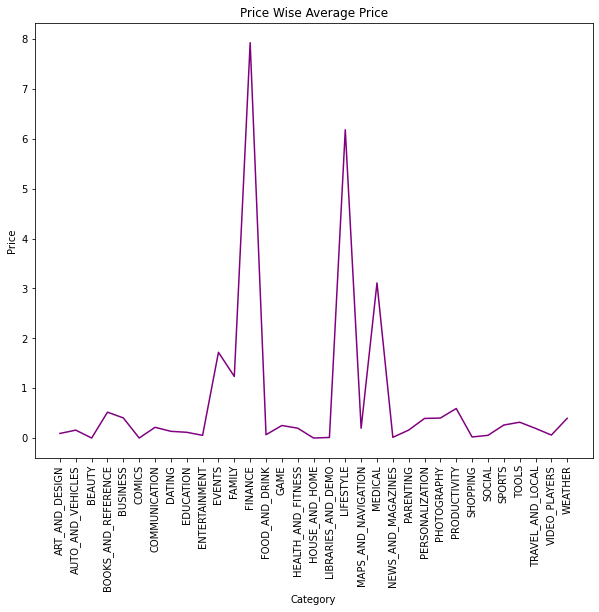

In [54]:
plt.figure(figsize=(10,8))
price = plt.plot(y,'r',color='purple')
plt.xticks(rotation = 90)
plt.title("Category Wise Average Price")
plt.xlabel("Category")
plt.ylabel("Price")
price

C:\Users\vivek\AppData\Local\Temp\ipykernel_10088\1941740499.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  reviews = plt.plot(z,'r--',color='blue')


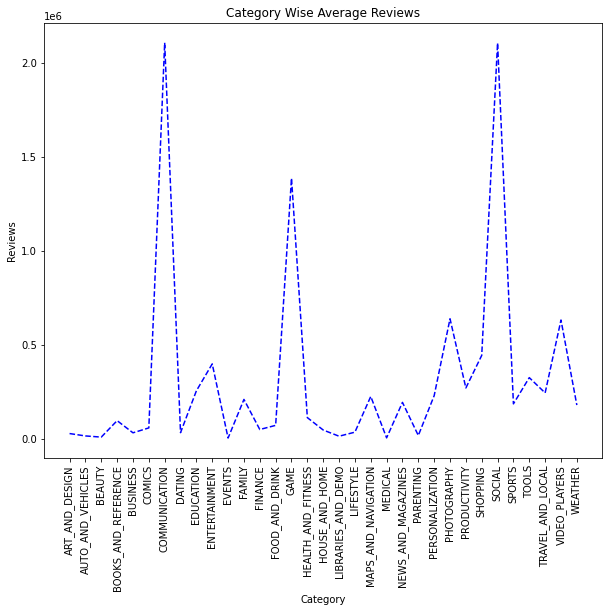

In [55]:
plt.figure(figsize=(10,8))
reviews = plt.plot(z,'r--',color='blue')
plt.xticks(rotation = 90)
plt.title("Category Wise Average Reviews")
plt.xlabel("Category")
plt.ylabel("Reviews")
reviews

In [56]:
df.to_csv('modified.csv')